In [1]:
%config Completer.use_jedi = False

In [2]:
import matplotlib.pyplot as plt

In [3]:
from tlefit_coe_fd import *

In [4]:
import numpy as np

In [5]:
line1 = '1 25544U 98067A   14020.93268519  .00009878  00000-0  18200-3 0  5082'
line2 = '2 25544  51.6498 109.4756 0003572  55.9686 274.8005 15.49815350868473'
satellite = EarthSatellite(line1, line2, 'ISS (ZARYA)', ts)

line1 = '1 40019U 14033K   21064.48089419  .00000027  00000-0  13123-4 0  9994'
line2 = '2 40019  97.7274 245.3630 0083155 314.3836  45.0579 14.67086574359033'
satellite = EarthSatellite(line1, line2, 'APRIZESAT 10', ts)

In [6]:
fit_method = test_tle_fit_normalized

iterations, sigma, sigmas, dxs, bs, lamdas, b_epoch, b_new_epoch, b, P, A = fit_method(satellite, lamda=1e-3, rms_epsilon=0.0001, debug=True)

Initial semi-major axis (a) = 7054.852 km
COE elements (original) = [7048.523352797561, 0.0083155, 1.7056648994135064, 4.282392212570847, 5.487028934272845, 0.786408709034353, 1.3123000000000001e-05]
Residuals at epoch time [ 5.60046126e-01 -3.55208784e+00 -1.46641965e+01 -2.73377804e-03
 -7.52656544e-03  1.66212876e-04]
Residual magnitudes at epoch time 15.0987, 0.00800939


#################### ITERATION 1 ####################

Condition number (A): 771.301
Condition number (ATWA_acc): 95944535.69933206
Lambda:  0.001
Residuals after/before 196 < 8.2e+06
Covariance a: 0.002 m
dx  [-6.32411703e+00  2.91139243e-04  8.86586783e-05  1.50200078e-06
 -1.39219881e-01  1.39216166e-01 -9.28583744e-04]
COE elements = [ 7.04852742e+03  8.25456845e-03  1.70566489e+00  4.28239371e+00
  5.48211003e+00  7.91329127e-01 -9.27583744e-04]

Current Solution 7048.527416026275 0.0082546 97.7274 245.3631 314.1018 45.3398 -9.2758e-04
        Original 7048.523352797561 0.0083155 97.7274 245.3630 314.3836 45.

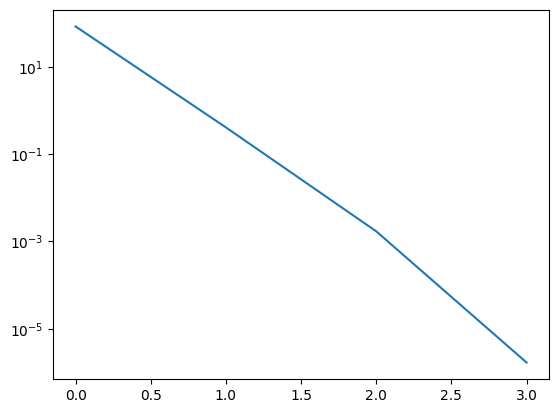

In [7]:
plt.semilogy(range(len(sigmas)), sigmas)

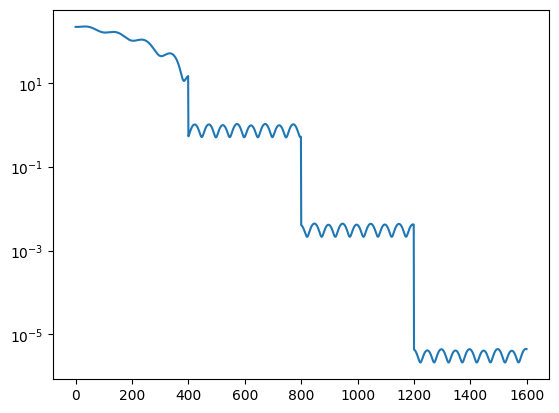

In [8]:
plt.semilogy(bs)

In [9]:
ls tles/*.txt

tles/22335.txt    tles/boom.txt         tles/gps-ops.txt  tles/spire.txt
tles/active.txt   tles/cubesat.txt      tles/planet.txt   tles/stations.txt
tles/analyst.txt  tles/engineering.txt  tles/ses.txt


In [10]:
tle_filename = 'tles/TWOLINE.TXT'
tle_filename = 'tles/22335.txt'

In [11]:
!head $tle_filename

0 VANGUARD 1
1 00005U 58002B   22334.74432056  .00000101  00000-0  15418-3 0  9999
2 00005  34.2490 346.9265 1845722  66.0949 312.1720 10.85038156302601
0 VANGUARD 1
1 00005U 58002B   22335.11262076  .00000100  00000-0  15292-3 0  9993
2 00005  34.2490 345.7915 1845718  67.7532 310.8033 10.85038245302646
0 VANGUARD 2
1    11U 59001A   22335.21011001  .00000606  00000-0  30430-3 0  9993
2    11  32.8791 287.3922 1465359 275.6560  67.9281 11.86232147723203
0 VANGUARD 2


In [12]:
with open(tle_filename, 'r') as f:
    
    tle_lines = f.readlines()
    
    tles = []
    
    for cnt, ix in enumerate(range(0, len(tle_lines), 3)):
        #print(cnt, ix, tle_lines[ix])
        tles.append((tle_lines[ix].strip(), tle_lines[ix + 1].strip(), tle_lines[ix + 2].strip()))
        

In [13]:
if tle_filename == 'TWOLINE.TXT':
    with open(tle_filename, 'r') as f:

        tle_lines = f.readlines()

        tles = []
        tle = []

        for line in tle_lines:
            if line.startswith('#'):
                continue
                
            tle.append(line.strip())
            
            if line.startswith('2 '):
                tles.append((tle[0][2:9], tle[0], tle[1]))
                tle = []
        

In [14]:
tles[:3]

[('0 VANGUARD 1',
  '1 00005U 58002B   22334.74432056  .00000101  00000-0  15418-3 0  9999',
  '2 00005  34.2490 346.9265 1845722  66.0949 312.1720 10.85038156302601'),
 ('0 VANGUARD 1',
  '1 00005U 58002B   22335.11262076  .00000100  00000-0  15292-3 0  9993',
  '2 00005  34.2490 345.7915 1845718  67.7532 310.8033 10.85038245302646'),
 ('0 VANGUARD 2',
  '1    11U 59001A   22335.21011001  .00000606  00000-0  30430-3 0  9993',
  '2    11  32.8791 287.3922 1465359 275.6560  67.9281 11.86232147723203')]

In [16]:
# LM Test

limit = 100#9*1000000
failed_tles = []

print(f'{"TLE":24s} {"Iter":>5s} {"Cov (m)":>10s}   {"StdDev (m)":>10s}   {"Res @ Epoch (m)":>13s}   {"Res @ End (m)":>13s}')

for idx, tle in enumerate(tles):

    line1 = tle[1]
    line2 = tle[2]
    satellite = EarthSatellite(line1, line2, tle[0], ts)
    
    try:
        iterations, sigma, sigmas, dxs, bs, lamdas, b_epoch, b_new_epoch, b, P, A = fit_method(satellite, fit_span=1, max_iter=25, lamda=1e-3, rms_epsilon=0.0001, debug=False)

        print(f'{tle[0]:24s} {iterations:5d} {np.sqrt(np.diag(P)[0]) * 1000:10.3f} {sigma * 1000:12.2e} {np.linalg.norm(b_new_epoch[0:3]) * 1000:17.2e} {np.linalg.norm(b[0:3]) * 1000:15.2e}')
    except:
        print(f'{tle[0]:24s} Failed')
    
    if idx == limit:
        break
    

TLE                       Iter    Cov (m)   StdDev (m)   Res @ Epoch (m)   Res @ End (m)
0 VANGUARD 1                 4    183.904     4.40e-08          1.63e-08        1.79e-08
0 VANGUARD 1                 4    181.921     5.58e-08          5.74e-09        4.88e-09
0 VANGUARD 2                 3    228.803     1.54e-05          2.30e-05        2.18e-05
0 VANGUARD 2                 3    231.099     1.53e-05          2.19e-05        2.07e-05
0 VANGUARD R/B               4    107.637     7.22e-08          1.18e-08        2.15e-08
0 VANGUARD R/B               4    105.711     7.06e-08          2.46e-08        2.11e-08
0 VANGUARD R/B               4    103.844     6.95e-08          1.35e-08        3.40e-08
0 VANGUARD R/B               4    195.807     4.64e-08          1.27e-08        3.14e-08
0 VANGUARD R/B               4    194.680     4.62e-08          2.91e-08        1.30e-08
0 VANGUARD 3                 3    215.412     1.82e-05          3.42e-05        3.59e-05
0 VANGUARD 3         